# Data Preprocessing

### Importing libraries and CSV file

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import dask
import dask_ml
import distributed
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/home/vibhav911/Documents/DS_Projects/shipment_price_prediction/data/train.csv')
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [3]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

# Data Cleaning

## Checking for Null Values

In [4]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
for feature in features_with_nan:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Artist Reputation 11.53846 % missing values
Height 5.76923 % missing values
Width 8.98462 % missing values
Weight 9.03077 % missing values
Material 11.75385 % missing values
Transport 21.41538 % missing values
Remote Location 11.86154 % missing values


In [5]:
features_with_nan

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Material',
 'Transport',
 'Remote Location']

#### When considering the potential impact of the missing data on the Dataset, it is important to consider the underlying reasons for why the data are missing
### Missing data are of three categories:
#### Missing completely at random (MCAR)
#### Missing at random (MAR).
#### Missing not at random (MNAR). 

## CHecking for duplicate values

In [6]:
df.duplicated().sum()

0

### Observation
#### There are no deplicated values in the data

# Separating Features

In [7]:
target_feature = 'Cost'
numeric_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
numeric_feature.remove(target_feature)
non_numeric_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('We have {} Numeric features:{}'.format(len(numeric_feature), numeric_feature))
print('We have {} Non numeric features:{}'.format(len(non_numeric_feature), non_numeric_feature))

We have 6 Numeric features:['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price']
We have 13 Non numeric features:['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


In [8]:
numeric_feature

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price']

## Imputing null values with median to check for multicollinearity

In [9]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [10]:
df1 = df.copy()
for i in numeric_feature:
    df1[i].fillna(df1[i].median(), inplace=True)

In [11]:
df1.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation           0
Height                      0
Width                       0
Weight                      0
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

## Multicollinearity Check

### Variance Inflation Factor

#### Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
#### Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [12]:
import statsmodels.api as sm
for i in range(0, len(numeric_feature)):
    x = df1[numeric_feature[i]]
    y = df1.Cost
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/(1-rsq), 2)
    print("Variance Inflation Factor of {} column is {} \n".format(numeric_feature[i], vif))

Variance Inflation Factor of Artist Reputation column is 1.01 

Variance Inflation Factor of Height column is 1.01 

Variance Inflation Factor of Width column is 1.02 

Variance Inflation Factor of Weight column is 1.2 

Variance Inflation Factor of Price Of Sculpture column is 1.3 

Variance Inflation Factor of Base Shipping Price column is 1.01 



### Observation
#### All columns have VIF around 1, hence there is no severe multicollinearity

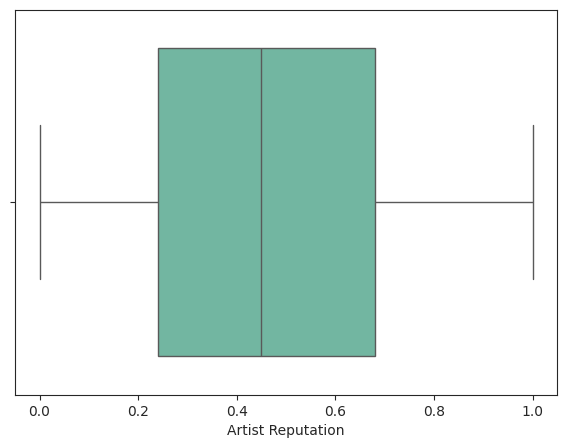

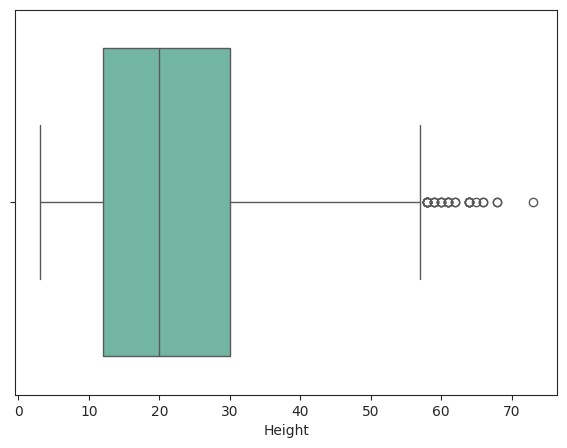

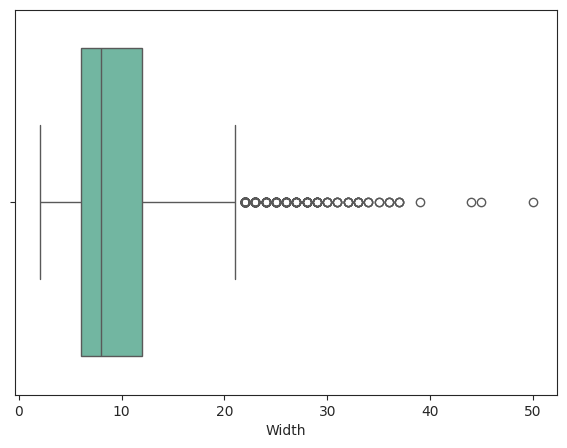

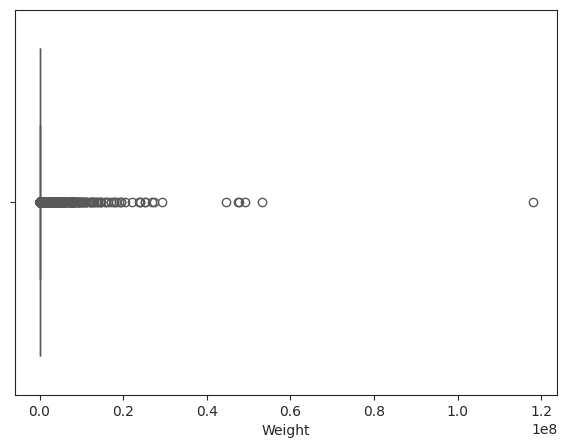

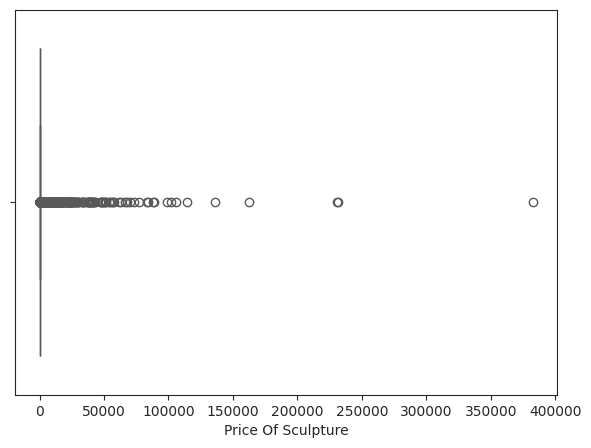

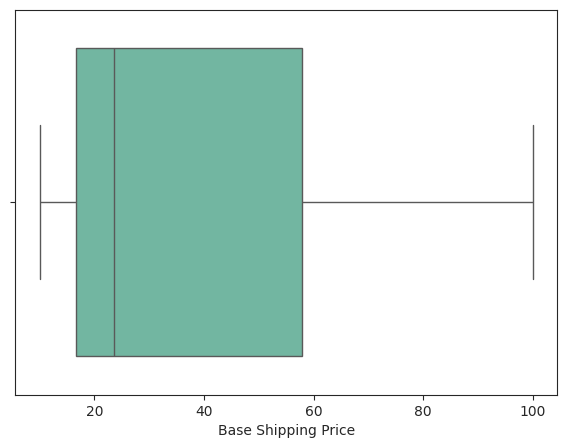

In [13]:
for i in numeric_feature:
    plt.figure(figsize=(7,5))
    sns.set_style('ticks')
    sns.boxplot(df[i], orient='h', palette='Set2')

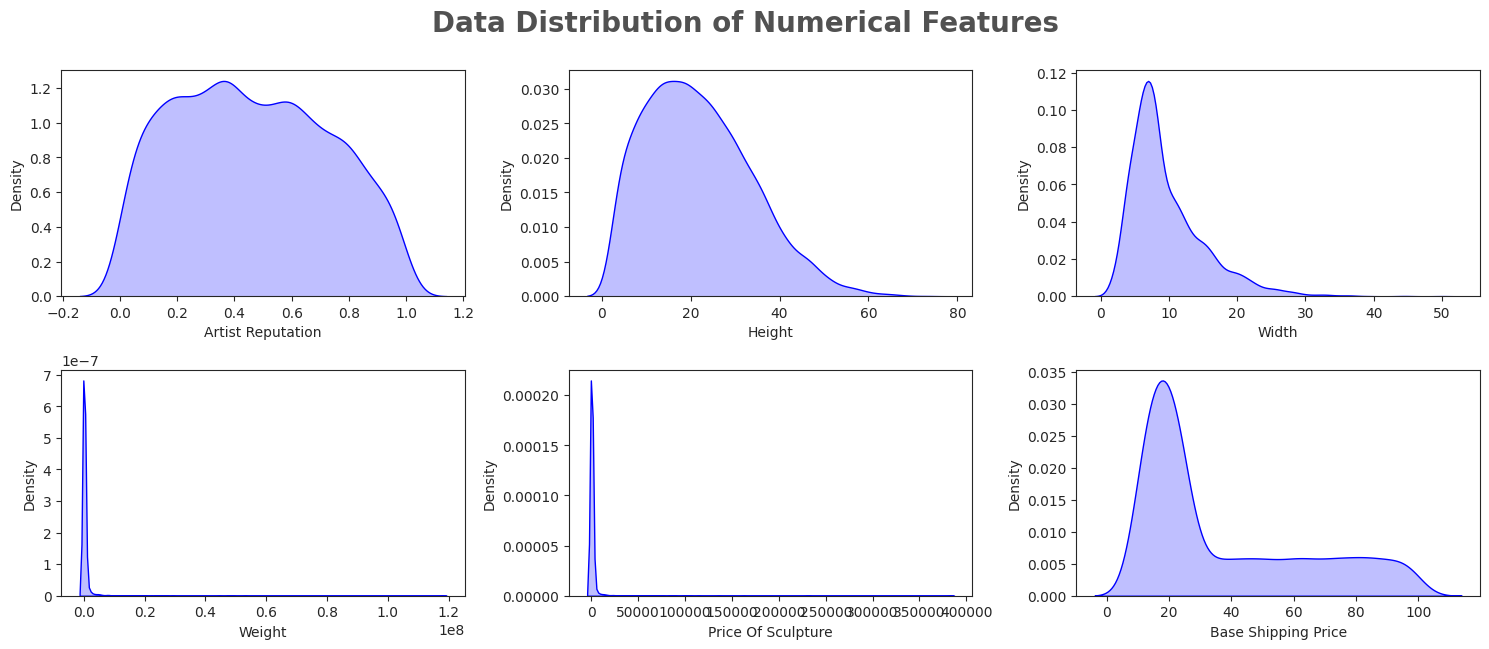

In [14]:
plt.figure(figsize=(15,15))
plt.suptitle('Data Distribution of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
for i in range(0, len(numeric_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_feature[i]], shade=True, color='b')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

In [15]:
df[numeric_feature].skew()

Artist Reputation       0.141363
Height                  0.594041
Width                   1.546702
Weight                 21.556174
Price Of Sculpture     22.206823
Base Shipping Price     0.918102
dtype: float64

### Observation
#### 1) Weight and Price of Sculpture are extremely skewed, maybe because of Outlier.
#### 2) We can handle these case with power transformer or log transformer
#### 3) Width, Base Shipping Price is sligthy positively skewed but not severe as shown by skewness coefficient.

## Checking the Power Transformer on Outliers

In [16]:
df1.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation           0
Height                      0
Width                       0
Weight                      0
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [17]:
outlier_features = ['Weight', 'Price Of Sculpture']

In [18]:
outlier_data = df1[outlier_features]

In [19]:
outlier_features = ['Weight', 'Price Of Sculpture']
outlier_data = df1[outlier_features]
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')

df1[outlier_features] = pt.fit_transform(df1[outlier_features])
df_outlier = pd.DataFrame(outlier_data, columns=outlier_features)

In [20]:
df_outlier = pd.DataFrame(outlier_data, columns=outlier_features)

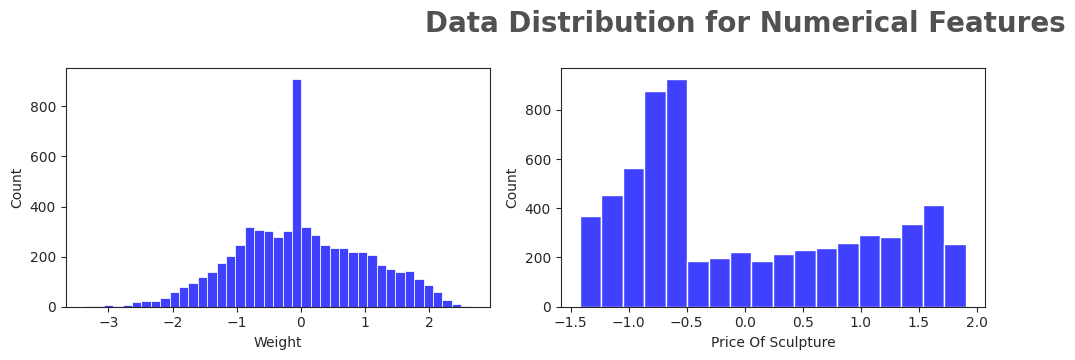

In [21]:
plt.figure(figsize=(15, 15))
plt.suptitle('Data Distribution for Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(outlier_features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df1[outlier_features[i]], color='b')
    plt.xlabel(outlier_features[i])
    plt.tight_layout()


In [22]:
df1[outlier_features].skew()

Weight                0.024918
Price Of Sculpture    0.438879
dtype: float64

### Observation
#### Power Transformer did a good job in overcome skewness and handling outliers

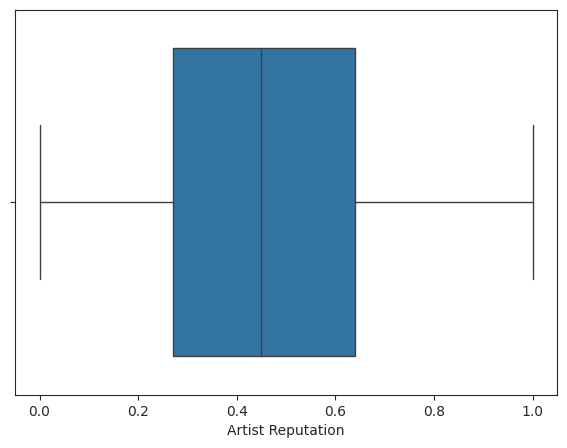

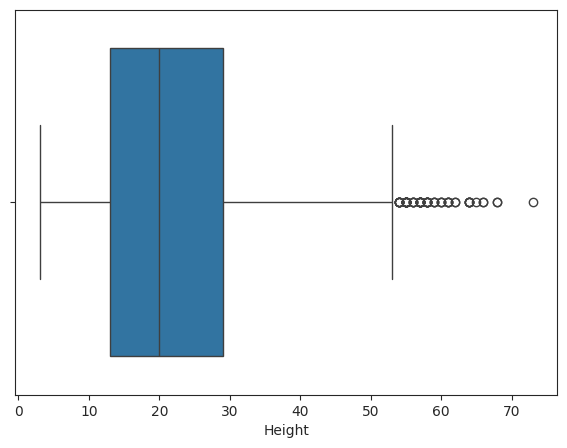

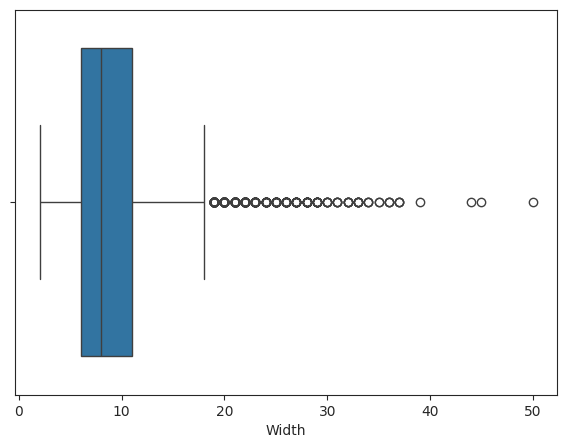

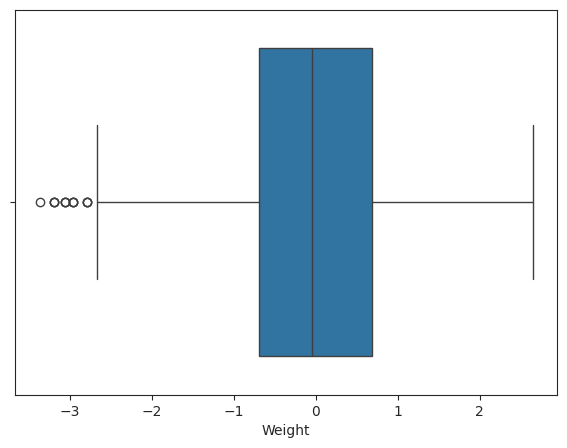

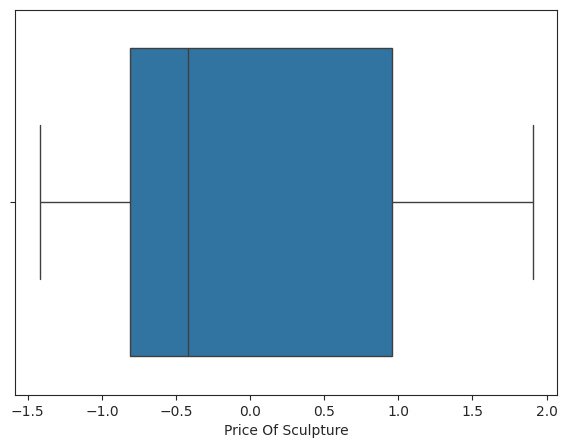

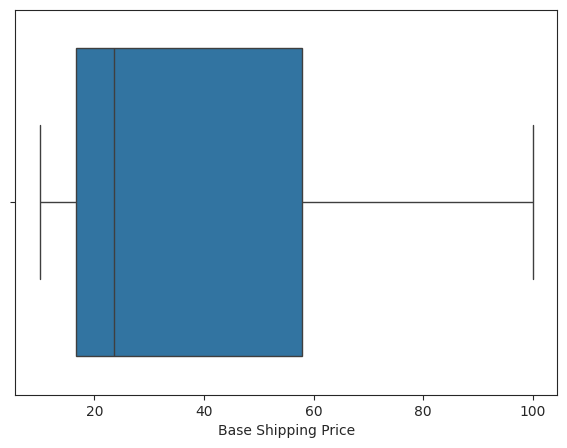

In [23]:
for i in numeric_feature:
    plt.figure(figsize=(7,5))
    sns.set_style('ticks')
    ax = sns.boxplot(df1[i], orient='h')

### Removing outliers from Target Column
#### Because most model would perform better on noiseless data, as Outlier might skew the findings of your model in one direction

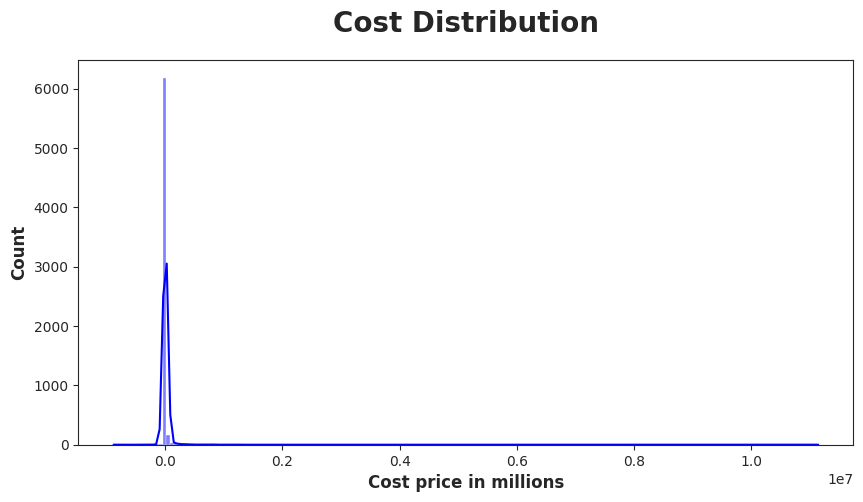

In [24]:
plt.subplots(figsize=(10,5))
sns.histplot(df['Cost'], bins=200, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.show()

In [25]:
df1['Cost'].skew()

29.817459343776964

Need to apply transformation to target column to make it normally distributed. we use 1p to avoid `inf` values arise dued to `0` in the target column

In [26]:
df1['Cost'] = np.log1p(df1['Cost'])

In [27]:
df1['Cost'].skew()

1.7804525777227338

In [28]:
df1.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation           0
Height                      0
Width                       0
Weight                      0
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                      659
dtype: int64

(array([1973., 1985.,  954.,  461.,  223.,  127.,   64.,   32.,   16.,
           6.]),
 array([ 4.46671239,  5.64267721,  6.81864203,  7.99460685,  9.17057167,
        10.34653649, 11.5225013 , 12.69846612, 13.87443094, 15.05039576,
        16.22636058]),
 <BarContainer object of 10 artists>)

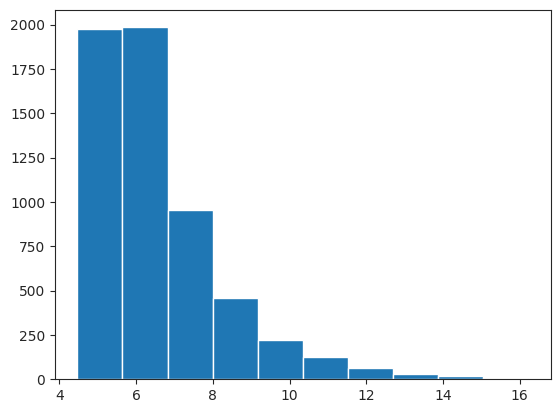

In [29]:
plt.hist(df1['Cost'])

### Observation
#### Data looks good after the log transformation but not Normally distributed.

### Feature Creation for Date Columns

In [30]:
# Convert object datatype to datetime
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

In [31]:
df['Month'] = pd.to_datetime(df['Scheduled Date']).dt.month
df['Year'] = pd.to_datetime(df['Scheduled Date']).dt.year

numeric_feature.append('Month')
numeric_feature.append('Year')

### Drop Unnecessary Column
#### Drop Customer Id, Artist Name and Customer Location columns having huge number of unique values.

#### Scheduled Date and Delivery Date can be dropped since the required features are extracted form it

In [32]:
to_drop_columns = ['Customer Id', 'Artist Name', 'Customer Location', 'Scheduled Date', 'Delivery Date']


In [33]:
df.drop(columns=to_drop_columns, inplace=True, axis=1)

In [34]:
df['Cost'].fillna(df['Cost'].median(), inplace=True)

In [35]:
df

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,Month,Year
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,-283.29,6,2015
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,-159.96,3,2017
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,-154.29,3,2015
3,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,-161.16,5,2015
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,-159.23,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,872.43,3,2018
6496,0.67,15.0,NaN,18981.0,NaN,67.18,27.72,No,No,No,Roadways,No,Working Class,No,1347.02,8,2015
6497,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,NaN,Yes,Wealthy,No,354.55,4,2019
6498,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,5037.50,3,2019


# Model Building

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from cuml.metrics import r2_score, mean_squared_error, mean_absolute_error
from cuml.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from cuml.ensemble import RandomForestRegressor
from cuml.svm import SVR
from cuml.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from cuml.model_selection import GridSearchCV
from sklearn.model_selection import KFold, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import cupy

from dask.distributed import Client
import joblib
client= Client(processes=False)

In [38]:
X=df.drop(columns=['Cost'], axis=1)
y = np.abs(df['Cost'])
y = np.log1p(y)

In [39]:
y = pd.DataFrame(y)

# Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.2)

In [41]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5200, 16) (1300, 16)
(5200, 1) (1300, 1)


In [42]:
X_train

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Month,Year
2577,0.56,47.0,17.0,NaN,Marble,23949.03,76.31,No,Yes,No,Roadways,Yes,Working Class,Yes,8,2017
3577,0.67,23.0,9.0,928.0,Aluminium,5.24,21.51,No,Yes,No,Airways,No,Working Class,No,3,2015
1686,0.24,4.0,4.0,234.0,Brass,4.49,12.60,No,Yes,Yes,Roadways,No,Working Class,No,12,2017
2436,NaN,4.0,3.0,16.0,Aluminium,3.43,24.36,No,Yes,No,Airways,No,Wealthy,No,11,2018
4814,0.76,23.0,13.0,16068.0,Bronze,145.08,98.27,No,No,No,Roadways,No,Working Class,No,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,0.53,21.0,13.0,432.0,Wood,4.16,11.85,No,No,Yes,Airways,No,Working Class,Yes,6,2019
4525,0.31,33.0,9.0,1675.0,Aluminium,3.40,15.08,Yes,No,Yes,Roadways,No,Working Class,No,11,2018
328,0.04,42.0,15.0,4408968.0,NaN,3121.58,55.29,Yes,Yes,Yes,NaN,No,Working Class,No,9,2017
770,NaN,19.0,6.0,NaN,NaN,419.71,48.80,No,No,Yes,Waterways,No,Working Class,No,9,2018


## Feature Encoding and Scaling
### Selecting Numerical and Categorical features for feature SCaling

In [43]:
numeric_feature

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Month',
 'Year']

In [44]:
numeric_features = [feature for feature in numeric_feature if feature not in outlier_features]
Categorical_features = [feature for feature in non_numeric_feature if feature not in to_drop_columns]

(numeric_features), (Categorical_features), (outlier_features)

(['Artist Reputation',
  'Height',
  'Width',
  'Base Shipping Price',
  'Month',
  'Year'],
 ['Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location'],
 ['Weight', 'Price Of Sculpture'])

### Observation:
#### Mean imputer: Since we handeled outlier by powertransformer for the continuous features the mean and median of the features are nearly same. When there are no outliers mean performs an a better imputer.
#### Standardscaler: As the features distribution are nearly normal we use standard scaler.
#### Power Transformer: Since avg_glucose_level are skewed we use Power Transformer on them

## Making Pipeline for Feature Scaling

In [45]:
numeric_feature_pipeline = Pipeline(
    steps= [
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', RobustScaler())
    ]
)

categorical_feature_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoder', OneHotEncoder(drop='first'))
    ]
)

outlier_feature_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('transformer', PowerTransformer(method='box-cox', standardize=True))
    ]
)

preprocessor = ColumnTransformer(
    [
        ('Numeric Pipeline', numeric_feature_pipeline, numeric_features),
        ('Categorical Pipeline', categorical_feature_pipeline, Categorical_features),
        ('Outliers Feature Pipeline', outlier_feature_pipeline, outlier_features)
    ]
)

In [46]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [47]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

X_train = X_train.to_cupy()
y_train = y_train.to_cupy()
X_test = X_test.to_cupy()
y_test = y_test.to_cupy()


In [48]:
#X_train = X_train
#X_test = np.asarray(X_test)

## Model Selection
#### Here should understand the Various Classification models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with HyperParameter Tuning

In [49]:
# functions which takes true and predicted values to calculate metrics
def evaluate_reg(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_Score = r2_score(true, predicted)
    return mae, mse, rmse, r2_Score

In [50]:
# function which can evaluate models and return a report 
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''  

    models_list = []
    r2_list = []

    for i in range(0, len(list(models))):
        model = list(models.values())[i]
        
        #with joblib.parallel_backend('dask'):
        model.fit(X_train, y_train)

        # Make Predictions
        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)

        # Evaluate train and test datasets
        model_train_mae, model_train_mse, model_train_rmse, model_train_r2Score = evaluate_reg(y_train, y_train_predict)
        model_test_mae, model_test_mse, model_test_rmse, model_test_r2Score = evaluate_reg(y_test, y_test_predict)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model Performance for Training Set')
        print("Mean Absolute Error: {:.4f}".format(model_train_mae))
        print('Mean Squared Error: {:.4f}'.format(model_train_mse))
        print('Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
        print('r2 Score: {:.4f}'.format(model_train_r2Score))

        print('Model Performance for Test Set')
        print("Mean Absolute Error: {:.4f}".format(model_test_mae))
        print('Mean Squared Error: {:.4f}'.format(model_test_mse))
        print('Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
        print('r2 Score: {:.4f}'.format(model_test_r2Score))
        r2_list.append(model_test_r2Score)

        print('='*35)
        print('\n')

    report = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name','r2_Score']).sort_values(by=['r2_Score'], ascending=False)

    return report
        

In [51]:
# Initializing Models 
models = {
    'Linear Regression': LinearRegression(),
    'K-Neighbour Regression': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBRegressor': XGBRegressor(tree_method="hist", device="cuda"),
    'CatBoost Regressor': CatBoostRegressor(verbose=False, max_depth=5,task_type="GPU"),
    #'Adaboost Regressor': AdaBoostRegressor(),
    'SVR': SVR()
}

In [52]:
base_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Linear Regression
Model Performance for Training Set
Mean Absolute Error: 0.4947
Mean Squared Error: 0.5244
Root Mean Squared Error: 0.7242
r2 Score: 0.8086
Model Performance for Test Set
Mean Absolute Error: 0.5227
Mean Squared Error: 0.5735
Root Mean Squared Error: 0.7573
r2 Score: 0.7846


K-Neighbour Regression
Model Performance for Training Set
Mean Absolute Error: 0.3310
Mean Squared Error: 0.2776
Root Mean Squared Error: 0.5269
r2 Score: 0.8987
Model Performance for Test Set
Mean Absolute Error: 0.4024
Mean Squared Error: 0.4280
Root Mean Squared Error: 0.6542
r2 Score: 0.8392


Random Forest Regressor
Model Performance for Training Set
Mean Absolute Error: 0.2235
Mean Squared Error: 0.0874
Root Mean Squared Error: 0.2957
r2 Score: 0.9681
Model Performance for Test Set
Mean Absolute Error: 0.4631
Mean Squared Error: 0.3948
Root Mean Squared Error: 0.6283
r2 Score: 0.8517


Decision Tree
Model Performance for Training Set
Mean Absolute Error: 0.0000
Mean Squared Error: 0.0000
Roo

In [53]:
base_report

,Model Name,r2_Score
3,Decision Tree,0.920519
4,SVR,0.892423
2,Random Forest Regressor,0.851708
1,K-Neighbour Regression,0.839221
0,Linear Regression,0.784592


## Initializing few parameters for hyperparameter tuning

In [54]:
svr_params = {
    'C': [1, 10, 12, 14, 16, 18, 20, 22],
    'gamma': [0.001, 0.01, 0.1, 1, 2, 5],
    'epsilon': [0.001, 0.01, 0.1, 1, 2, 4],
    'kernel': ("rbf", "poly", "sigmoid")
    }
cat_params = {
    'learning_rate': [0.03, 0.06],
    'depth':[3, 6, 9],
    'l2_leaf_reg': [2, 3, 4],
    'boosting_type': ['Ordered', 'Plain']
}
rf_params = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [55]:
# Model list for hyperparameter tuning
randomsearch_model = [
    ('SVR', SVR(), svr_params),
    ('RandomForestRegressor', RandomForestRegressor(), rf_params)
]

In [56]:
kf = KFold(n_splits=3, random_state=1, shuffle=True)

In [ ]:
model_param = {}
for name, model, params in randomsearch_model:
    random = GridSearchCV(estimator=model,
                                param_grid=params,
                                cv=kf,
                                verbose=1,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f'--------- Best Params for {model_name} ---------')
    print(model_param[model_name])

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


## reInitialize models with best parameters

In [ ]:
models = {
    'Random Forest Regressor': RandomForestRegressor(**model_param['RandomForestRegressor'], n_jobs=-1),
    #'Catboost': CatBoostRegressor(**model_param['Catboost'], verbose=False),
    'SVR': SVR(**model_param['SVR'], verbose=False)
}

In [ ]:
retrained_report = evaluate_models(X_train, X_test, y_train, y_test, models)

In [ ]:
retrained_report

### Best Model is

In [5]:
import yaml
with open("/home/vibhav911/Documents/DS_Projects/shipment_price_prediction/notebooks/DataDriftReport.yaml", 'r+') as stream:
    data = yaml.safe_load(stream)



In [14]:
def find(key, dictionary):
    for k, v in dictionary.items():
        if k == key:
            yield v
        elif isinstance(v, dict):
            for result in find(key, v):
                yield result
        elif isinstance(v, list):
            for d in v:
                for result in find(key, d):
                    yield result

for x in find("dataset_drift", data):
    print(x)

False
False


AttributeError: 'float' object has no attribute 'items'

In [8]:
import sys
from pathlib import Path
import ruamel.yaml

in_file = Path('/home/vibhav911/Documents/DS_Projects/shipment_price_prediction/notebooks/DataDriftReport.yaml')

yaml = ruamel.yaml.YAML()
data = yaml.load(in_file)

def lookup(sk, d, path=[]):
   # lookup the values for key(s) sk return as list the tuple (path to the value, value)
   if isinstance(d, dict):
       for k, v in d.items():
           if k == sk:
               yield (path + [k], v)
           for res in lookup(sk, v, path + [k]):
               yield res
   elif isinstance(d, list):
       for item in d:
           for res in lookup(sk, item, path + [item]):
               yield res

for path, value in lookup("dataset_drift", data):
    print(path, '->', value)

['metrics', {'metric': 'DatasetDriftMetric', 'result': {'dataset_drift': False, 'drift_share': 0.5, 'number_of_columns': 15, 'number_of_drifted_columns': 1, 'share_of_drifted_columns': 0.06666666666666667}}, 'result', 'dataset_drift'] -> False
['metrics', {'metric': 'DataDriftTable', 'result': {'current_fi': None, 'dataset_drift': False, 'drift_by_columns': {'Artist Reputation': {'column_name': 'Artist Reputation', 'column_type': 'num', 'current': {'small_distribution': {'x': [0.0, 0.098, 0.196, 0.29400000000000004, 0.392, 0.49, 0.5880000000000001, 0.686, 0.784, 0.882, 0.98], 'y': [0.758104133183734, 1.152318282439276, 1.1674803651029502, 1.4707220183764447, 1.1978045304303002, 0.9248870424841548, 1.0006974558025292, 1.1523182824392761, 0.7581041331837343, 0.6216453892106621]}}, 'drift_detected': False, 'drift_score': 0.5261301929996701, 'reference': {'small_distribution': {'x': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0], 'y': 

In [12]:
import sys
import yaml

with open("/home/vibhav911/Documents/DS_Projects/shipment_price_prediction/notebooks/DataDriftReport.yaml", 'r+') as stream:
    data = yaml.safe_load(stream)

def find(key, dictionary):
    # everything is a dict
    for k, v in dictionary.items():
        if k == key:
            yield v
        elif isinstance(v, dict):
            for result in find(key, v):
                yield result

for x in find("dataset_drift", data):
    print(x)

In [45]:
import yaml
with open("/home/vibhav911/Documents/DS_Projects/shipment_price_prediction/notebooks/DataDriftReport.yaml", 'r') as stream:
    data = yaml.load(stream, Loader=yaml.FullLoader)
    print(data['metrics']['metric'=="DatasetDriftMetric"]['result']['dataset_drift'])

False


In [34]:
df = data['metrics']['metric']

TypeError: list indices must be integers or slices, not str